In [26]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt

In [27]:
from helper import RoadCBA
from helper.sample_projects import load_sample_bypass

In [28]:
b = load_sample_bypass()

In [29]:
b["RP"]

,name,variant_0,variant_1,length,length_bridges,length_tunnels,category,lanes,environment,width,layout,toll_sections
id_section,,,,,,,,,,,,
0,entrance,1,1,0.5,0.0,0,standard,2,extravilan,9.5,wide,1
1,city,1,1,4.0,0.0,0,standard,2,intravilan,9.5,narrow,1
2,exit,1,1,0.4,0.0,0,standard,2,extravilan,9.5,wide,1
3,bypass,0,1,3.9,0.1,0,standard,2,extravilan,11.5,wide,1


In [30]:
b["C_fin"]

,,2020,2021,2022
item,category,,,
planning and design,preparation,150000,150000,150000
land,preparation,300000,300000,300000
site preparation,construction,0,0,0
earthworks,construction,0,0,0
pavements asphalt,construction,14000000,14000000,14000000
pavements concrete,construction,0,0,0
bridges,construction,1500000,1500000,1500000
tunnels,construction,0,0,0
buildings,construction,0,0,0


In [31]:
rcba = RoadCBA(2020, 2020, "svk")
rcba.load_parameters()
rcba.read_project_inputs(*b.values())
rcba.economic_analysis()

/Users/ayaanhaque/Desktop/Traffix/notebooks/cost-prediction/helper/param_container.py:222: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vtts = vtts.groupby(["vehicle"])["gdp_ga2", "value2"].sum()


Done. Time: 2.13 s.


In [32]:
rcba.print_economic_indicators()

ENPV: 3.34 M EUR
ERR : 5.62 %
BCR : 1.08


In [33]:
rcba.EBCR

1.0757620136184416

In [34]:
b = load_sample_bypass()

In [35]:
ls = np.arange(3, 5, 0.2)
BCRs = []

In [36]:
%%time

for l in ls:
    b["RP"].loc[3, "length"] = l
    
    rcba = RoadCBA(2020, 2020, "svk")
    rcba.load_parameters()
    rcba.read_project_inputs(*b.values())
    rcba.economic_analysis()
    
    BCRs.append(rcba.EBCR)

Done. Time: 2.94 s.
Done. Time: 2.95 s.
Done. Time: 2.84 s.
Done. Time: 3.14 s.
Done. Time: 2.47 s.
Done. Time: 2.27 s.
Done. Time: 2.08 s.
Done. Time: 2.03 s.
Done. Time: 2.27 s.
Done. Time: 2.08 s.
CPU times: user 15.6 s, sys: 450 ms, total: 16.1 s
Wall time: 26.8 s


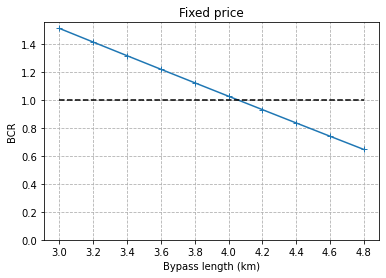

In [37]:
plt.plot(ls, BCRs, "+-")
plt.plot(ls, np.ones_like(ls), "k--")
plt.xlabel("Bypass length (km)")
plt.ylabel("BCR")
plt.ylim(bottom=0)
plt.xticks(ls)
plt.title("Fixed price")
plt.grid(linestyle="--")

In [38]:
ls = np.arange(3, 5, 0.2)

In [ ]:
BCRs = []

b = load_sample_bypass()
l_0 = 3.9
capex_0 = b["C_fin"]

for l in ls:
    b["RP"].loc[3, "length"] = l
    b["C_fin"] = capex_0 * l / l_0
    
    rcba = RoadCBA(2020, 2020, "svk")
    rcba.load_parameters()
    rcba.read_project_inputs(*b.values())
    rcba.economic_analysis()
    BCRs.append(rcba.EBCR)

/Users/ayaanhaque/Desktop/Traffix/notebooks/cost-prediction/helper/param_container.py:222: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vtts = vtts.groupby(["vehicle"])["gdp_ga2", "value2"].sum()


Done. Time: 2.26 s.
Done. Time: 2.24 s.
Done. Time: 2.47 s.
Done. Time: 2.73 s.
Done. Time: 5.53 s.
Done. Time: 4.99 s.
Done. Time: 3.94 s.
Done. Time: 5.31 s.


In [ ]:
plt.plot(ls, BCRs, "+-", ms=10, mew=2)
plt.plot(ls, np.ones_like(ls), "k--")
plt.xlabel("Bypass length (km)")
plt.ylabel("BCR")
plt.xticks(ls)
plt.ylim(bottom=0)
plt.title("Investment depending on bypass length")
plt.grid(linestyle="--")

In [ ]:
yr_op = b["C_fin"].columns[-1] + 1 # first year of operation
id_op = list(b["I1"].columns).index(yr_op) # index of the first year of operation

secs_old = [0, 1, 2]

In [ ]:
b = load_sample_bypass()

dIs = np.linspace(-600, 1000, 9)

In [ ]:
BCRs = []

for dI in dIs:
    I0 = b["I0"].copy()
    I0.loc[idx[:, ["hgv", "car"]], I0.columns] += dI
    
    I1 = b["I1"].copy()
    I1.loc[idx[3, "car"], I1.columns[id_op:]] += dI
    I1.loc[idx[3, "hgv"], I1.columns[id_op:]] += dI
    
    I1.loc[idx[secs_old, "car"], I1.columns[:id_op]] += dI
    I1.loc[idx[secs_old, "hgv"], I1.columns[:id_op]] += dI
    
    rcba = RoadCBA(2020, 2020, "svk")
    rcba.load_parameters()
    rcba.read_project_inputs(b["RP"], b["C_fin"], I0, I1, b["V0"], b["V1"])
    rcba.economic_analysis()
    BCRs.append(rcba.EBCR)

In [ ]:
plt.plot(dIs, BCRs, "+-", ms=10, mew=2)
plt.plot(dIs, np.ones_like(dIs), "k--")
plt.xlabel("Excess intensities of cars and HGV (veh/24h)")
plt.ylabel("BCR")
plt.xticks(dIs, rotation=90)
plt.ylim(bottom=0)
plt.title("Variation in intensities")
plt.grid(linestyle="--")

In [ ]:
b = load_sample_bypass()

In [ ]:
yr_i = b["C_fin"].columns[0]
N_yrs_bld = list(range(1, 6))

In [ ]:
# fill values before the official start

yr = yr_op - 1
while yr >= yr_i:
    growth_fac = (b["I1"][yr+2] / b["I1"][yr+1]).fillna(1)
    b["I1"][yr] = (b["I1"][yr+1] / growth_fac).astype(int)
    yr -= 1 

In [ ]:
capex = b["C_fin"].copy()

In [ ]:
BCRs = []

for N_yr_bld in N_yrs_bld:
    yrs_bld = np.arange(yr_i, yr_i + N_yr_bld)
    
    # restructure CAPEX
    capex = pd.DataFrame(pd.concat([b["C_fin"].sum(1)] * N_yr_bld, 1) / N_yr_bld)
    capex.columns = yrs_bld
    
    # recompute intensities
    I1 = b["I1"].copy()
    I1[yrs_bld] = I0[yrs_bld]
    I1 = I1.fillna(0)
    
    rcba = RoadCBA(2020, 2020, "svk")
    rcba.load_parameters()
    rcba.read_project_inputs(b["RP"], capex, b["I0"], I1, b["V0"], b["V1"])
    rcba.economic_analysis()
    BCRs.append(rcba.EBCR)

In [ ]:
plt.plot(N_yrs_bld, BCRs, "+-", ms=10, mew=2)
plt.plot(N_yrs_bld, np.ones_like(N_yrs_bld), "k--")
plt.xlabel("Period of construction (years)")
plt.ylabel("BCR")
plt.xticks(N_yrs_bld)
plt.ylim(bottom=0)
plt.title("Varying period of construction")
plt.grid(linestyle="--")